In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [18]:
def load_data(vector_file):
    # Load words and vectors:
    LATENT_DIM = 2048
    mapping = []
    X = []
    with(open(vector_file, 'r')) as file:
        lines = file.readlines()
        counter = 0
        for line in lines:
            data = line.split(' ')
            X.append([float(i) for i in data[1:LATENT_DIM+1]])
            mapping.append((data[0], counter))
            counter += 1
    return X, mapping

In [19]:
def plot_3d(X, mapping, from_, to_):
    X = np.array(X)
    y = np.array([i for i in range(len(mapping))])
    fig = plt.figure(1, figsize=(18, 18))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)

    plt.cla()
    pca = decomposition.PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)
    
    X = X[from_:to_]
    y = y[from_:to_]
    mapping = mapping[from_:to_]   

    for name, label in mapping:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 0.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center', fontsize=20,
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    #y = np.choose(y, [i for i in range(len(mapping))]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
               edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()

In [20]:
# Word based state. Paper
X, mapping = load_data('../../../Evaluations/EN2DE_fastai_model_fastai_pre_proc_hidden_dim_1024_wmt16_1000000/hidden_states/model_checkpoint.053-2.096.states')

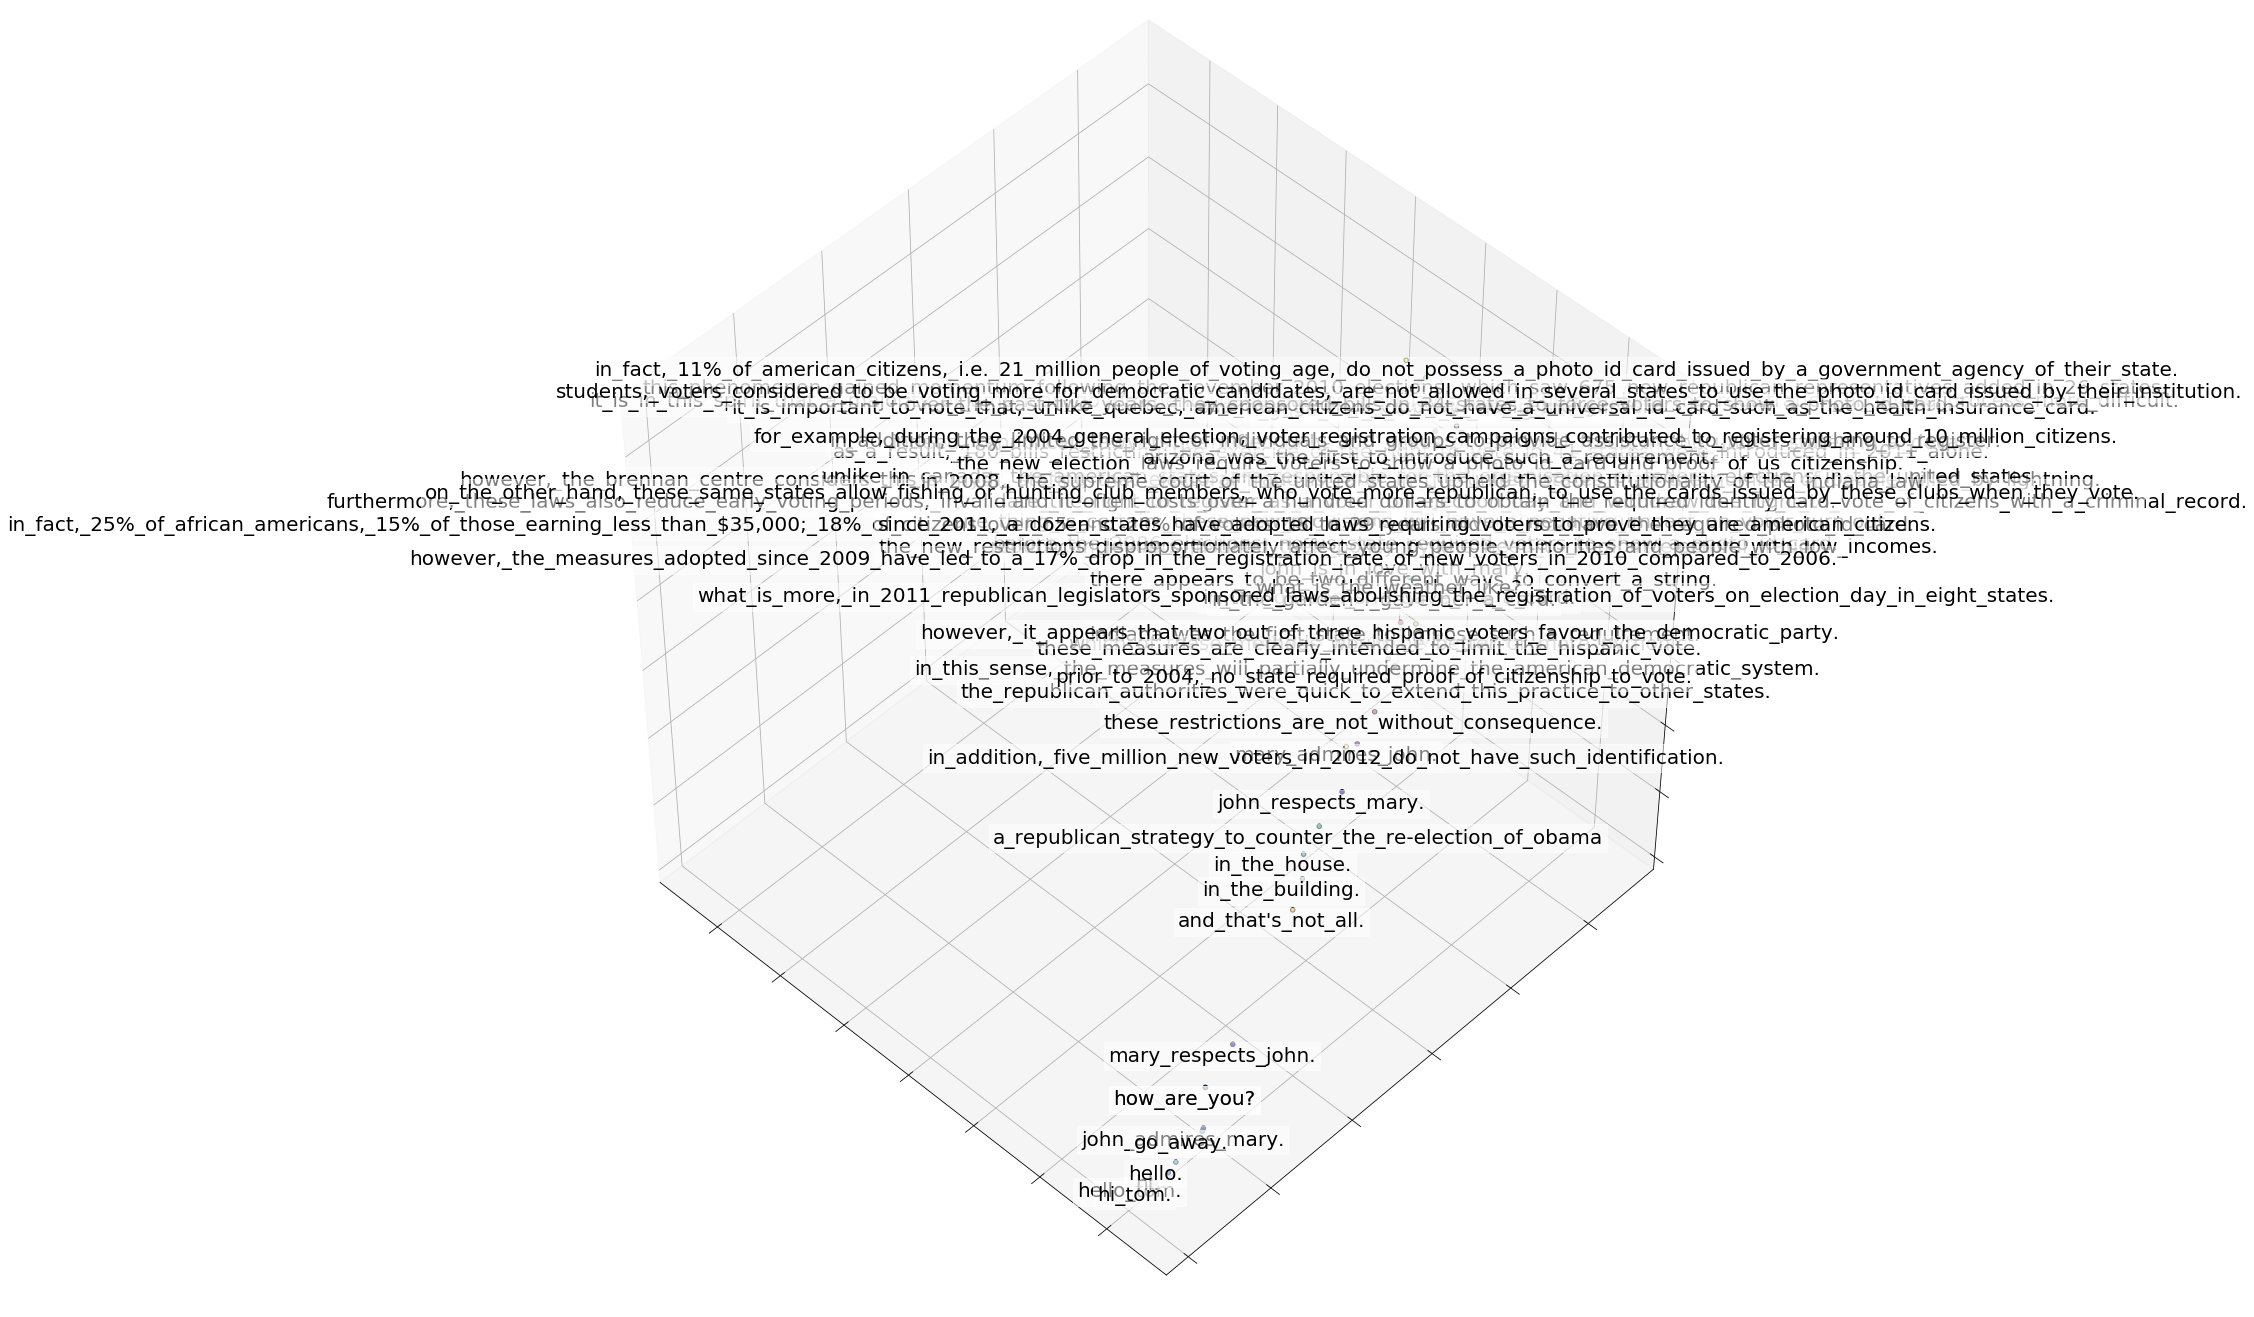

In [25]:
plot_3d(X, mapping, 0, 60)

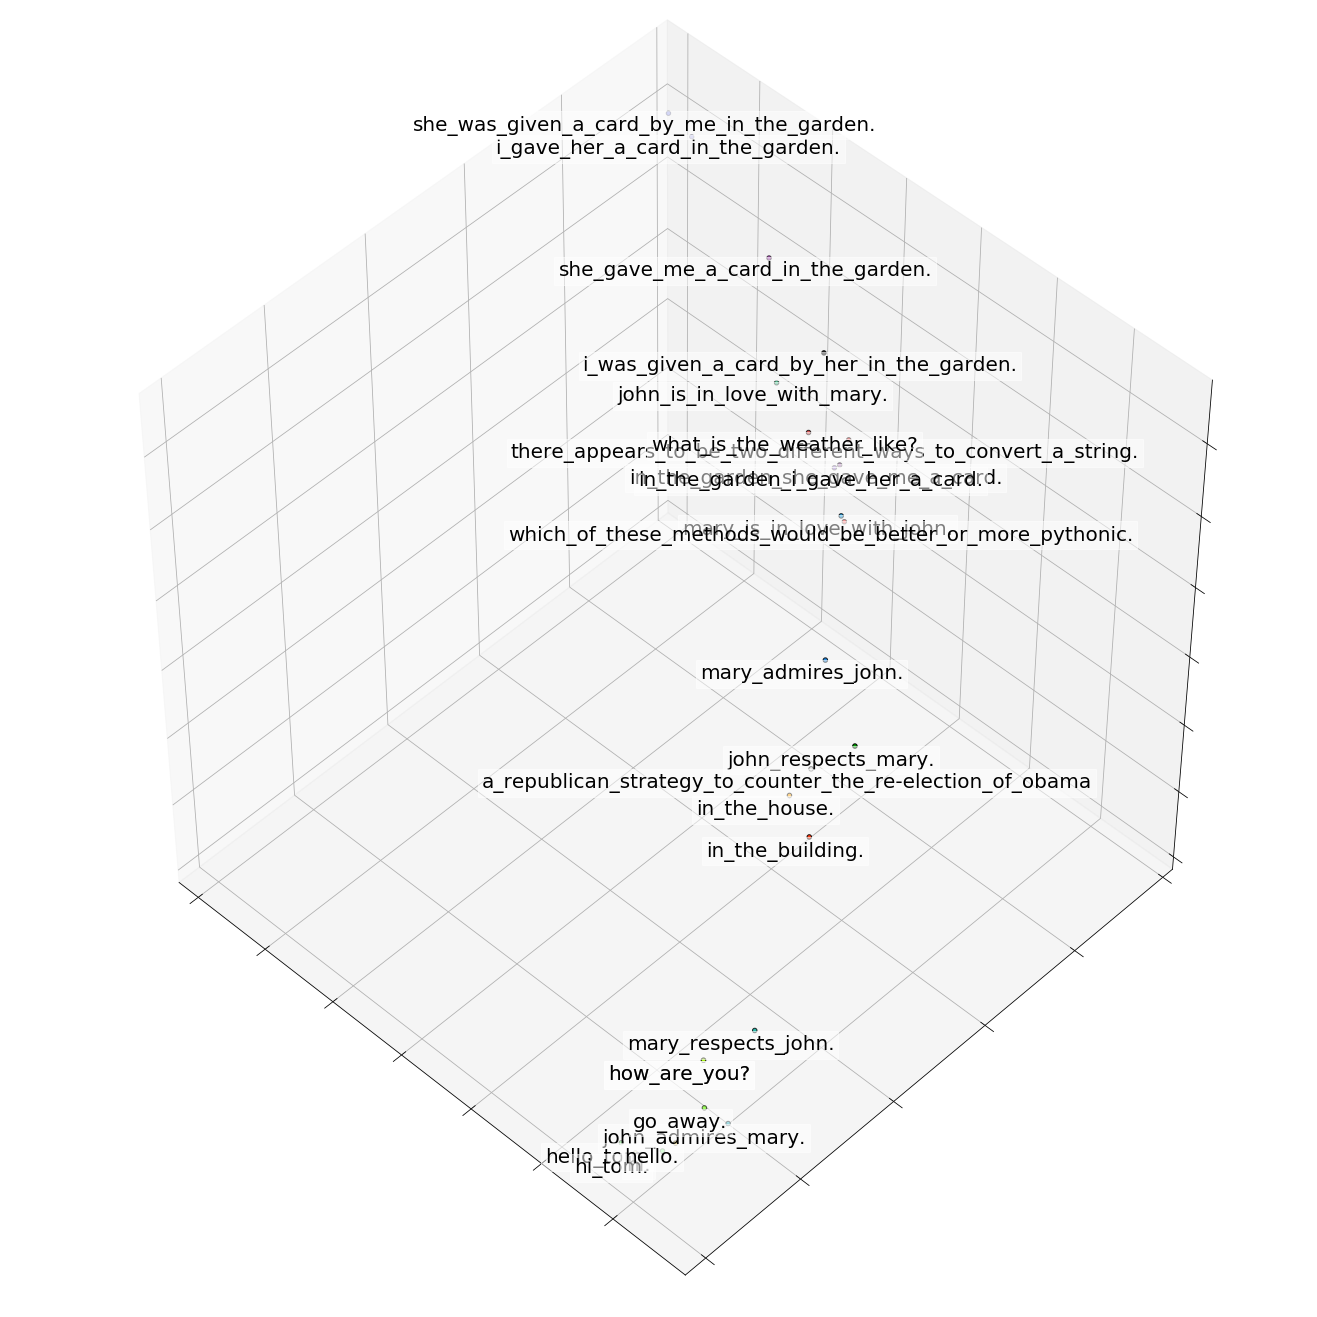

In [29]:
# Word based state. Paper
X, mapping = load_data('../../../Evaluations/EN2DE_fastai_model_fastai_pre_proc_hidden_dim_1024_wmt16_1000000/hidden_states/model_checkpoint.053-2.096.states')
plot_3d(X, mapping, 0, 25)

In [80]:
with(open('../../../Evaluations/EN2DE_fastai_model_fastai_pre_proc_hidden_dim_1024_wmt16_1000000/hidden_states/model_checkpoint.053-2.096.states')) as ini:
    a = ini.readlines()
len(a)
print(a[0])

i was given a card by her in the garden. -0.761594 1.0 0.0 1.0 -1.0 -0.0 0.0 0.0 0.891638 0.0 -0.0 0.0 -0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 -0.0 -1.0 -1.0 -0.0 0.0 0.0 -1.0 0.0 0.0 0.0 -0.0 -0.0 0.0 1.0 0.0 0.0 -1.0 -0.693519 0.76158 0.0 0.0 0.0 0.0 -0.0 -0.0 -0.0 0.0 0.0 1.0 -0.0 -0.0 -1.0 -0.0 1.0 -0.0 0.0 0.0 0.0 0.0 0.0 -0.905585 0.0 0.0 1.0 0.0 -0.0 0.0 -1.0 0.0 1.0 0.0 0.0 -0.0 -0.000152548 0.0 0.0 0.0 -1.0 0.0 -1.0 -1.0 0.0 -0.589113 0.0 0.0 -0.0 0.0 -1.0 -0.0 0.0 -0.0 -1.0 -0.0 -1.0 0.761585 -1.0 0.0 -0.0 0.0 -1.0 0.0 -0.0 -0.0 0.0 -0.609948 0.0 -0.0 -0.0 0.0 0.0 -0.761594 -0.0 1.0 -0.0 0.0 0.759272 -0.761594 -0.0 0.0 -0.0 -0.150895 0.0 0.0 0.0 0.0 1.0 0.761594 0.0 -0.761594 -1.0 1.0 -0.995055 -0.0 0.0 -0.761594 0.0 -1.0 0.0 0.0 0.0 1.0 0.0 0.761594 0.0 0.0 -1.0 0.0 -0.0 0.0 0.0 -1.0 -0.0 0.0 -1.0 -0.0 0.0 1.0 0.0 0.0 0.0 -0.0 0.0 -0.0 1.0 0.0 0.0 0.0 -0.0246176 0.0 -0.375138 1.0 -0.0 0.0 -0.0 -0.0 0.761593 0.0 0.761594 0.0 0.761594 0.0 1.0 -0.0 0.0 1.0 0.761592 1.0 0.0 0.0 0.0

In [81]:
bb=[]
for line in a:
    line = line.strip("\n")
    data = line.split(' ')
    sent = ""
    for tok in data[:len(data)-2049]:
        sent += tok + "_"
    sent = sent[:len(sent)-1] + " "
    for tok in data[-2049:]:
        sent+=tok + " "
    bb.append(sent)

In [82]:
with(open('../../../Evaluations/EN2DE_fastai_model_fastai_pre_proc_hidden_dim_1024_wmt16_1000000/hidden_states/model_checkpoint.053-2.096.states', 'w')) as ini:
    for line in bb:
        ini.write(line+ "\n")